In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
%matplotlib inline
import pandas as pd
import numpy as np

# Data import 

In [2]:
from dataPreprocessing import preprocess_data,split_time_series,preprocess_data_with_PCA

lag_step_for_SanJuan = 15
lag_step_for_Iquitos = 20

sanJuan_data, iquitos_data = preprocess_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv",
                                    lag_step_for_SanJuan = lag_step_for_SanJuan,
                                    lag_step_for_Iquitos = lag_step_for_Iquitos)


sanJuan_features = sanJuan_data.drop('total_cases', axis=1)
sanJuan_targets = sanJuan_data['total_cases']

iquitos_features = iquitos_data.drop('total_cases', axis=1)
iquitos_targets = iquitos_data['total_cases']

C:\Users\PERSONAL\Desktop\Study\Projects\LeadingIndia Mentorship Projects\DengAI\DengAI-master\DengAI-master\dataPreprocessing.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column + "_time - " + str(lag)] = dataframe[column].shift(lag)  # copy the previous value
C:\Users\PERSONAL\Desktop\Study\Projects\LeadingIndia Mentorship Projects\DengAI\DengAI-master\DengAI-master\dataPreprocessing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
C:\ProgramData\Anaconda

# Training 

In [3]:
import py_compile
py_compile.compile('hyperParameterTuning.py')
test_set_ratio = 0.3 
X_sj_train, X_sj_test, y_sj_train, y_sj_test = split_time_series(sanJuan_features, sanJuan_targets, test_set_ratio)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = split_time_series(iquitos_features, iquitos_targets, test_set_ratio)


##  Hyperparameter tuning for San Juan with Gradient Boosting (histGradientBoosting)

In [4]:
from hyperParameterTuning import find_best_params_histGradientBoosting, find_best_params_RandomForest

In [5]:
parameters1_SanJuan = [10,20,50,100,200,300,500]
parameters2_SanJuan = [10,16,32,64,128,256]
parameters3_SanJuan=[4, 8, 16, 32]
parameter4_SanJuan=[10,16,32,64,128,256]
param1_sj_1, param2_sj_1,param3_sj_1,param4_sj_1, scores__mean_absulute_error_sj = find_best_params_histGradientBoosting(X_sj_train,
                                                                                 y_sj_train,
                                                                                 X_sj_test,
                                                                                 y_sj_test,
                                                                                 parameters1_SanJuan,
                                                                                 parameters2_SanJuan,
                                                                                 parameters3_SanJuan,
                                                                                 parameter4_SanJuan)                               
                                                                                                                

mean_absolute_error [max_iter,max_leaf_nodes]: mean absolute error
mean_absolute_error [10,10,4,10]: 26.34878692261786
mean_absolute_error [10,10,4,16]: 26.70579330478401
mean_absolute_error [10,10,4,32]: 26.61305973457644
mean_absolute_error [10,10,4,64]: 26.640734279414957
mean_absolute_error [10,10,4,128]: 26.58107051177665
mean_absolute_error [10,10,4,256]: 26.73356157284543
mean_absolute_error [10,10,8,10]: 26.030408226293744
mean_absolute_error [10,10,8,16]: 26.665397595259606
mean_absolute_error [10,10,8,32]: 26.51618199586126
mean_absolute_error [10,10,8,64]: 26.57431738458075
mean_absolute_error [10,10,8,128]: 26.46457199704114
mean_absolute_error [10,10,8,256]: 26.77106795579212
mean_absolute_error [10,10,16,10]: 26.030408226293744
mean_absolute_error [10,10,16,16]: 26.665397595259606
mean_absolute_error [10,10,16,32]: 26.51618199586126
mean_absolute_error [10,10,16,64]: 26.57431738458075
mean_absolute_error [10,10,16,128]: 26.46457199704114
mean_absolute_error [10,10,16,256]

mean_absolute_error [20,10,8,16]: 26.05974785663986
mean_absolute_error [20,10,8,32]: 25.60658636811856
mean_absolute_error [20,10,8,64]: 25.675604416987444
mean_absolute_error [20,10,8,128]: 25.6620425602062
mean_absolute_error [20,10,8,256]: 26.24542439934454
mean_absolute_error [20,10,16,10]: 24.806702791702634
mean_absolute_error [20,10,16,16]: 26.05974785663986
mean_absolute_error [20,10,16,32]: 25.60658636811856
mean_absolute_error [20,10,16,64]: 25.675604416987444
mean_absolute_error [20,10,16,128]: 25.6620425602062
mean_absolute_error [20,10,16,256]: 26.24542439934454
mean_absolute_error [20,10,32,10]: 24.806702791702634
mean_absolute_error [20,10,32,16]: 26.05974785663986
mean_absolute_error [20,10,32,32]: 25.60658636811856
mean_absolute_error [20,10,32,64]: 25.675604416987444
mean_absolute_error [20,10,32,128]: 25.6620425602062
mean_absolute_error [20,10,32,256]: 26.24542439934454
mean_absolute_error [20,16,4,10]: 25.2220880005575
mean_absolute_error [20,16,4,16]: 25.98084037

mean_absolute_error [50,10,16,64]: 25.34441303730797
mean_absolute_error [50,10,16,128]: 24.485713337057643
mean_absolute_error [50,10,16,256]: 25.16148728673798
mean_absolute_error [50,10,32,10]: 24.11968480590973
mean_absolute_error [50,10,32,16]: 25.13195008036814
mean_absolute_error [50,10,32,32]: 24.749757093039896
mean_absolute_error [50,10,32,64]: 25.34441303730797
mean_absolute_error [50,10,32,128]: 24.485713337057643
mean_absolute_error [50,10,32,256]: 25.16148728673798
mean_absolute_error [50,16,4,10]: 24.49198635975286
mean_absolute_error [50,16,4,16]: 24.848964537011003
mean_absolute_error [50,16,4,32]: 25.007638581327154
mean_absolute_error [50,16,4,64]: 25.781419738283372
mean_absolute_error [50,16,4,128]: 25.064657446162183
mean_absolute_error [50,16,4,256]: 25.267302023897138
mean_absolute_error [50,16,8,10]: 25.320737811902152
mean_absolute_error [50,16,8,16]: 25.922792018537375
mean_absolute_error [50,16,8,32]: 25.227837841887364
mean_absolute_error [50,16,8,64]: 25.7

mean_absolute_error [100,10,32,256]: 25.78653205698813
mean_absolute_error [100,16,4,10]: 25.31825857265063
mean_absolute_error [100,16,4,16]: 25.48998586494791
mean_absolute_error [100,16,4,32]: 25.937320944236244
mean_absolute_error [100,16,4,64]: 26.374007796552704
mean_absolute_error [100,16,4,128]: 25.48462154621098
mean_absolute_error [100,16,4,256]: 25.751329827934352
mean_absolute_error [100,16,8,10]: 26.320598107306015
mean_absolute_error [100,16,8,16]: 26.72658345855016
mean_absolute_error [100,16,8,32]: 26.53982019742675
mean_absolute_error [100,16,8,64]: 27.03361918955251
mean_absolute_error [100,16,8,128]: 26.833588375818845
mean_absolute_error [100,16,8,256]: 26.730801823152408
mean_absolute_error [100,16,16,10]: 26.472690765272805
mean_absolute_error [100,16,16,16]: 26.8290030450584
mean_absolute_error [100,16,16,32]: 26.953242014774258
mean_absolute_error [100,16,16,64]: 27.001136348580317
mean_absolute_error [100,16,16,128]: 26.50467555692677
mean_absolute_error [100,1

mean_absolute_error [200,16,8,10]: 28.61784403718289
mean_absolute_error [200,16,8,16]: 28.944329152185023
mean_absolute_error [200,16,8,32]: 28.36654633069721
mean_absolute_error [200,16,8,64]: 29.08612576994531
mean_absolute_error [200,16,8,128]: 28.42793458560982
mean_absolute_error [200,16,8,256]: 28.547183079534644
mean_absolute_error [200,16,16,10]: 28.388281253547778
mean_absolute_error [200,16,16,16]: 28.893527980676172
mean_absolute_error [200,16,16,32]: 28.33829704110024
mean_absolute_error [200,16,16,64]: 29.003751921905565
mean_absolute_error [200,16,16,128]: 28.24841722214689
mean_absolute_error [200,16,16,256]: 28.251109660215114
mean_absolute_error [200,16,32,10]: 28.388281253547778
mean_absolute_error [200,16,32,16]: 28.893527980676172
mean_absolute_error [200,16,32,32]: 28.33829704110024
mean_absolute_error [200,16,32,64]: 29.003751921905565
mean_absolute_error [200,16,32,128]: 28.24841722214689
mean_absolute_error [200,16,32,256]: 28.251109660215114
mean_absolute_erro

mean_absolute_error [300,16,16,10]: 29.412988096349675
mean_absolute_error [300,16,16,16]: 29.93750039109521
mean_absolute_error [300,16,16,32]: 28.93647507614127
mean_absolute_error [300,16,16,64]: 30.51938955482507
mean_absolute_error [300,16,16,128]: 29.661494632302894
mean_absolute_error [300,16,16,256]: 29.286701932107547
mean_absolute_error [300,16,32,10]: 29.412988096349675
mean_absolute_error [300,16,32,16]: 29.93750039109521
mean_absolute_error [300,16,32,32]: 28.93647507614127
mean_absolute_error [300,16,32,64]: 30.51938955482507
mean_absolute_error [300,16,32,128]: 29.661494632302894
mean_absolute_error [300,16,32,256]: 29.286701932107547
mean_absolute_error [300,32,4,10]: 28.78214838672864
mean_absolute_error [300,32,4,16]: 28.465228335956397
mean_absolute_error [300,32,4,32]: 27.822320389773857
mean_absolute_error [300,32,4,64]: 28.639225645926842
mean_absolute_error [300,32,4,128]: 27.265245776940002
mean_absolute_error [300,32,4,256]: 27.640838074703133
mean_absolute_err

mean_absolute_error [500,16,32,10]: 30.054739499087187
mean_absolute_error [500,16,32,16]: 30.668019681483848
mean_absolute_error [500,16,32,32]: 29.36896984927053
mean_absolute_error [500,16,32,64]: 31.64232400053173
mean_absolute_error [500,16,32,128]: 30.680740512034777
mean_absolute_error [500,16,32,256]: 30.220169298312133
mean_absolute_error [500,32,4,10]: 29.894628306738106
mean_absolute_error [500,32,4,16]: 29.532562552709248
mean_absolute_error [500,32,4,32]: 28.764969427896386
mean_absolute_error [500,32,4,64]: 29.60302744682945
mean_absolute_error [500,32,4,128]: 28.272654273182678
mean_absolute_error [500,32,4,256]: 28.435963801518252
mean_absolute_error [500,32,8,10]: 30.632376705481906
mean_absolute_error [500,32,8,16]: 30.97093503291053
mean_absolute_error [500,32,8,32]: 30.290121792479823
mean_absolute_error [500,32,8,64]: 31.562379403120808
mean_absolute_error [500,32,8,128]: 30.0869622591239
mean_absolute_error [500,32,8,256]: 30.38700092271
mean_absolute_error [500,3

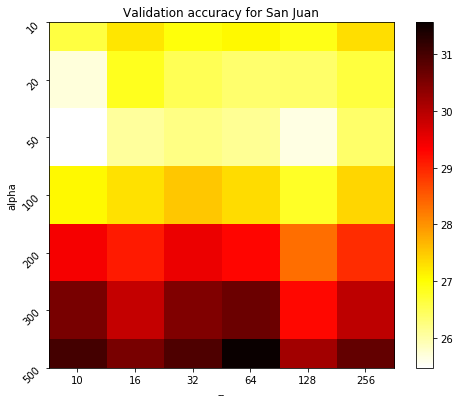

In [6]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores__mean_absulute_error_sj, interpolation='nearest', cmap=plt.cm.hot_r)
plt.ylabel('alpha')
plt.xlabel('--')
plt.colorbar()
plt.yticks(np.arange(len(parameters1_SanJuan)), parameters1_SanJuan, rotation=45)
plt.xticks(np.arange(len(parameters2_SanJuan)), parameters2_SanJuan)
plt.title('Validation accuracy for San Juan')
plt.show()

## Hyperparameter tuning for  Iquitos  with Gradient Boosting (histGradientBoosting)

In [7]:
parameters1_Iquitos = [10,20,50,100,200,300,500]
parameters2_Iquitos = [10,16,32,64,128,256]
parameters3_Iquitos =  [4, 8, 16, 32]
parameter4_Iquitos=[10,16,32,64,128,256]
param1_iq_1, param2_iq_1,param3_iq_1,param4_iq_1, scores__mean_absulute_error_iq = find_best_params_histGradientBoosting(X_iq_train,
                                                                                 y_iq_train,
                                                                                 X_iq_test,
                                                                                 y_iq_test,
                                                                                 parameters1_Iquitos,
                                                                                 parameters2_Iquitos,
                                                                                 parameters2_Iquitos,parameter4_Iquitos)                             

mean_absolute_error [max_iter,max_leaf_nodes]: mean absolute error
mean_absolute_error [10,10,10,10]: 7.405371434190135
mean_absolute_error [10,10,10,16]: 7.3769837231121285
mean_absolute_error [10,10,10,32]: 7.379583469880476
mean_absolute_error [10,10,10,64]: 7.489987391229536
mean_absolute_error [10,10,10,128]: 7.4444442301737315
mean_absolute_error [10,10,10,256]: 7.466651322500729
mean_absolute_error [10,10,16,10]: 7.405371434190135
mean_absolute_error [10,10,16,16]: 7.3769837231121285
mean_absolute_error [10,10,16,32]: 7.379583469880476
mean_absolute_error [10,10,16,64]: 7.489987391229536
mean_absolute_error [10,10,16,128]: 7.4444442301737315
mean_absolute_error [10,10,16,256]: 7.466651322500729
mean_absolute_error [10,10,32,10]: 7.405371434190135
mean_absolute_error [10,10,32,16]: 7.3769837231121285
mean_absolute_error [10,10,32,32]: 7.379583469880476
mean_absolute_error [10,10,32,64]: 7.489987391229536
mean_absolute_error [10,10,32,128]: 7.4444442301737315
mean_absolute_error [

mean_absolute_error [10,128,16,64]: 7.484856848357296
mean_absolute_error [10,128,16,128]: 7.455271075448445
mean_absolute_error [10,128,16,256]: 7.4703252551631
mean_absolute_error [10,128,32,10]: 7.468870064622715
mean_absolute_error [10,128,32,16]: 7.4395879462574515
mean_absolute_error [10,128,32,32]: 7.3675352350687895
mean_absolute_error [10,128,32,64]: 7.484856848357296
mean_absolute_error [10,128,32,128]: 7.455271075448445
mean_absolute_error [10,128,32,256]: 7.4703252551631
mean_absolute_error [10,128,64,10]: 7.468870064622715
mean_absolute_error [10,128,64,16]: 7.4395879462574515
mean_absolute_error [10,128,64,32]: 7.3675352350687895
mean_absolute_error [10,128,64,64]: 7.484856848357296
mean_absolute_error [10,128,64,128]: 7.455271075448445
mean_absolute_error [10,128,64,256]: 7.4703252551631
mean_absolute_error [10,128,128,10]: 7.468870064622715
mean_absolute_error [10,128,128,16]: 7.4395879462574515
mean_absolute_error [10,128,128,32]: 7.3675352350687895
mean_absolute_error

mean_absolute_error [20,32,32,256]: 7.442334786165912
mean_absolute_error [20,32,64,10]: 7.423304860212318
mean_absolute_error [20,32,64,16]: 7.466190542778075
mean_absolute_error [20,32,64,32]: 7.39519746865643
mean_absolute_error [20,32,64,64]: 7.496486343338956
mean_absolute_error [20,32,64,128]: 7.4331325846393455
mean_absolute_error [20,32,64,256]: 7.442334786165912
mean_absolute_error [20,32,128,10]: 7.423304860212318
mean_absolute_error [20,32,128,16]: 7.466190542778075
mean_absolute_error [20,32,128,32]: 7.39519746865643
mean_absolute_error [20,32,128,64]: 7.496486343338956
mean_absolute_error [20,32,128,128]: 7.4331325846393455
mean_absolute_error [20,32,128,256]: 7.442334786165912
mean_absolute_error [20,32,256,10]: 7.423304860212318
mean_absolute_error [20,32,256,16]: 7.466190542778075
mean_absolute_error [20,32,256,32]: 7.39519746865643
mean_absolute_error [20,32,256,64]: 7.496486343338956
mean_absolute_error [20,32,256,128]: 7.4331325846393455
mean_absolute_error [20,32,25

mean_absolute_error [50,10,128,16]: 7.6760619752426935
mean_absolute_error [50,10,128,32]: 7.667634615845556
mean_absolute_error [50,10,128,64]: 7.7505877344282315
mean_absolute_error [50,10,128,128]: 7.622508835315091
mean_absolute_error [50,10,128,256]: 7.729037755798806
mean_absolute_error [50,10,256,10]: 7.625518736023117
mean_absolute_error [50,10,256,16]: 7.6760619752426935
mean_absolute_error [50,10,256,32]: 7.667634615845556
mean_absolute_error [50,10,256,64]: 7.7505877344282315
mean_absolute_error [50,10,256,128]: 7.622508835315091
mean_absolute_error [50,10,256,256]: 7.729037755798806
mean_absolute_error [50,16,10,10]: 7.599545879634123
mean_absolute_error [50,16,10,16]: 7.722969512948314
mean_absolute_error [50,16,10,32]: 7.701806137606424
mean_absolute_error [50,16,10,64]: 7.742450600677482
mean_absolute_error [50,16,10,128]: 7.628768642478413
mean_absolute_error [50,16,10,256]: 7.685045609915135
mean_absolute_error [50,16,16,10]: 7.598748428726158
mean_absolute_error [50,1

mean_absolute_error [50,128,256,128]: 7.62349648947032
mean_absolute_error [50,128,256,256]: 7.685735156312414
mean_absolute_error [50,256,10,10]: 7.599545879634123
mean_absolute_error [50,256,10,16]: 7.722969512948314
mean_absolute_error [50,256,10,32]: 7.701806137606424
mean_absolute_error [50,256,10,64]: 7.742450600677482
mean_absolute_error [50,256,10,128]: 7.628768642478413
mean_absolute_error [50,256,10,256]: 7.685045609915135
mean_absolute_error [50,256,16,10]: 7.598748428726158
mean_absolute_error [50,256,16,16]: 7.747652889140579
mean_absolute_error [50,256,16,32]: 7.709927042208749
mean_absolute_error [50,256,16,64]: 7.743157580872146
mean_absolute_error [50,256,16,128]: 7.62349648947032
mean_absolute_error [50,256,16,256]: 7.685735156312414
mean_absolute_error [50,256,32,10]: 7.598748428726158
mean_absolute_error [50,256,32,16]: 7.747652889140579
mean_absolute_error [50,256,32,32]: 7.709927042208749
mean_absolute_error [50,256,32,64]: 7.743157580872146
mean_absolute_error [5

mean_absolute_error [100,64,10,256]: 8.055639899200695
mean_absolute_error [100,64,16,10]: 7.842558466623755
mean_absolute_error [100,64,16,16]: 8.043742816003524
mean_absolute_error [100,64,16,32]: 8.057772868471607
mean_absolute_error [100,64,16,64]: 8.082040851516151
mean_absolute_error [100,64,16,128]: 8.01911094569044
mean_absolute_error [100,64,16,256]: 8.00515773379293
mean_absolute_error [100,64,32,10]: 7.842558466623755
mean_absolute_error [100,64,32,16]: 8.043742816003524
mean_absolute_error [100,64,32,32]: 8.057772868471607
mean_absolute_error [100,64,32,64]: 8.082040851516151
mean_absolute_error [100,64,32,128]: 8.01911094569044
mean_absolute_error [100,64,32,256]: 8.00515773379293
mean_absolute_error [100,64,64,10]: 7.842558466623755
mean_absolute_error [100,64,64,16]: 8.043742816003524
mean_absolute_error [100,64,64,32]: 8.057772868471607
mean_absolute_error [100,64,64,64]: 8.082040851516151
mean_absolute_error [100,64,64,128]: 8.01911094569044
mean_absolute_error [100,64

mean_absolute_error [200,16,16,256]: 8.185942374758735
mean_absolute_error [200,16,32,10]: 8.011203313648387
mean_absolute_error [200,16,32,16]: 8.286902776505967
mean_absolute_error [200,16,32,32]: 8.242948849680916
mean_absolute_error [200,16,32,64]: 8.232448999128227
mean_absolute_error [200,16,32,128]: 8.222651639528664
mean_absolute_error [200,16,32,256]: 8.185942374758735
mean_absolute_error [200,16,64,10]: 8.011203313648387
mean_absolute_error [200,16,64,16]: 8.286902776505967
mean_absolute_error [200,16,64,32]: 8.242948849680916
mean_absolute_error [200,16,64,64]: 8.232448999128227
mean_absolute_error [200,16,64,128]: 8.222651639528664
mean_absolute_error [200,16,64,256]: 8.185942374758735
mean_absolute_error [200,16,128,10]: 8.011203313648387
mean_absolute_error [200,16,128,16]: 8.286902776505967
mean_absolute_error [200,16,128,32]: 8.242948849680916
mean_absolute_error [200,16,128,64]: 8.232448999128227
mean_absolute_error [200,16,128,128]: 8.222651639528664
mean_absolute_err

mean_absolute_error [200,256,32,128]: 8.222651639528664
mean_absolute_error [200,256,32,256]: 8.185942374758735
mean_absolute_error [200,256,64,10]: 8.011203313648387
mean_absolute_error [200,256,64,16]: 8.286902776505967
mean_absolute_error [200,256,64,32]: 8.242948849680916
mean_absolute_error [200,256,64,64]: 8.232448999128227
mean_absolute_error [200,256,64,128]: 8.222651639528664
mean_absolute_error [200,256,64,256]: 8.185942374758735
mean_absolute_error [200,256,128,10]: 8.011203313648387
mean_absolute_error [200,256,128,16]: 8.286902776505967
mean_absolute_error [200,256,128,32]: 8.242948849680916
mean_absolute_error [200,256,128,64]: 8.232448999128227
mean_absolute_error [200,256,128,128]: 8.222651639528664
mean_absolute_error [200,256,128,256]: 8.185942374758735
mean_absolute_error [200,256,256,10]: 8.011203313648387
mean_absolute_error [200,256,256,16]: 8.286902776505967
mean_absolute_error [200,256,256,32]: 8.242948849680916
mean_absolute_error [200,256,256,64]: 8.2324489991

mean_absolute_error [300,64,64,128]: 8.331538314933372
mean_absolute_error [300,64,64,256]: 8.285597585690233
mean_absolute_error [300,64,128,10]: 8.080564862896527
mean_absolute_error [300,64,128,16]: 8.394890723553836
mean_absolute_error [300,64,128,32]: 8.304603762087794
mean_absolute_error [300,64,128,64]: 8.305005060102427
mean_absolute_error [300,64,128,128]: 8.331538314933372
mean_absolute_error [300,64,128,256]: 8.285597585690233
mean_absolute_error [300,64,256,10]: 8.080564862896527
mean_absolute_error [300,64,256,16]: 8.394890723553836
mean_absolute_error [300,64,256,32]: 8.304603762087794
mean_absolute_error [300,64,256,64]: 8.305005060102427
mean_absolute_error [300,64,256,128]: 8.331538314933372
mean_absolute_error [300,64,256,256]: 8.285597585690233
mean_absolute_error [300,128,10,10]: 8.136356358284178
mean_absolute_error [300,128,10,16]: 8.318829395660904
mean_absolute_error [300,128,10,32]: 8.261027716905033
mean_absolute_error [300,128,10,64]: 8.304944149832682
mean_a

mean_absolute_error [500,16,128,64]: 8.387410990800323
mean_absolute_error [500,16,128,128]: 8.39283194155534
mean_absolute_error [500,16,128,256]: 8.33807194696278
mean_absolute_error [500,16,256,10]: 8.151165663487546
mean_absolute_error [500,16,256,16]: 8.440399059800127
mean_absolute_error [500,16,256,32]: 8.398492351005352
mean_absolute_error [500,16,256,64]: 8.387410990800323
mean_absolute_error [500,16,256,128]: 8.39283194155534
mean_absolute_error [500,16,256,256]: 8.33807194696278
mean_absolute_error [500,32,10,10]: 8.199096768956723
mean_absolute_error [500,32,10,16]: 8.4228741771678
mean_absolute_error [500,32,10,32]: 8.36592794751236
mean_absolute_error [500,32,10,64]: 8.39325018191787
mean_absolute_error [500,32,10,128]: 8.247781966451749
mean_absolute_error [500,32,10,256]: 8.373028383920595
mean_absolute_error [500,32,16,10]: 8.151165663487546
mean_absolute_error [500,32,16,16]: 8.440399059800127
mean_absolute_error [500,32,16,32]: 8.398492351005352
mean_absolute_error [

mean_absolute_error [500,256,256,64]: 8.386482750970668
mean_absolute_error [500,256,256,128]: 8.39283194155534
mean_absolute_error [500,256,256,256]: 8.33807194696278

-------------------------
best_mean_absolute_error: 7.3675352350687895
max_iter: 10
max_leaf_nodes: 16
max_depth: 10
max_bins: 32
-------------------------



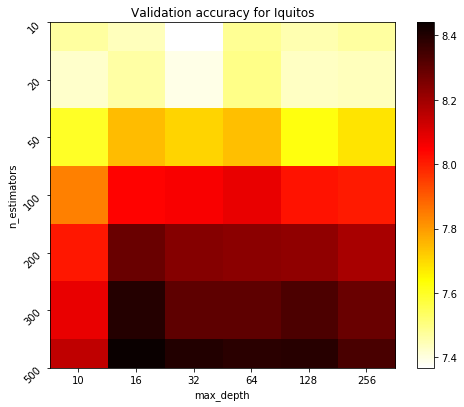

In [8]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores__mean_absulute_error_iq, interpolation='nearest', cmap=plt.cm.hot_r)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
plt.colorbar()
plt.yticks(np.arange(len(parameters1_Iquitos)), parameters1_Iquitos, rotation=45)
plt.xticks(np.arange(len(parameters2_Iquitos)), parameters2_Iquitos)
plt.title('Validation accuracy for Iquitos')
plt.show()

## Hyperparameter tuning for San Juan with RandomForest

In [9]:
parameters1_SanJuan = [10,20,50,100,200,300,500]
parameters2_SanJuan = [10,15,20,40,50,100]

param1_sj_2, param2_sj_2, scores__mean_absulute_error_sj = find_best_params_RandomForest(X_sj_train,
                                                                                 y_sj_train,
                                                                                 X_sj_test,
                                                                                 y_sj_test,
                                                                                 parameters1_SanJuan,
                                                                                 parameters2_SanJuan)

mean_absolute_error [n_estimators,max_depth]: mean absolute error
mean_absolute_error [10,10]: 26.76776996380578
mean_absolute_error [10,15]: 27.84023866543307
mean_absolute_error [10,20]: 27.783603626503986
mean_absolute_error [10,40]: 27.163345195729537
mean_absolute_error [10,50]: 27.163345195729537
mean_absolute_error [10,100]: 27.163345195729537
mean_absolute_error [20,10]: 26.479637838751806
mean_absolute_error [20,15]: 27.16172813913941
mean_absolute_error [20,20]: 27.10542575159123
mean_absolute_error [20,40]: 26.73665480427046
mean_absolute_error [20,50]: 26.73665480427046
mean_absolute_error [20,100]: 26.73665480427046
mean_absolute_error [50,10]: 26.288309662120078
mean_absolute_error [50,15]: 26.281037029912376
mean_absolute_error [50,20]: 26.256304827402495
mean_absolute_error [50,40]: 26.365978647686834
mean_absolute_error [50,50]: 26.365978647686834
mean_absolute_error [50,100]: 26.365978647686834
mean_absolute_error [100,10]: 26.203259968143417
mean_absolute_error [100,

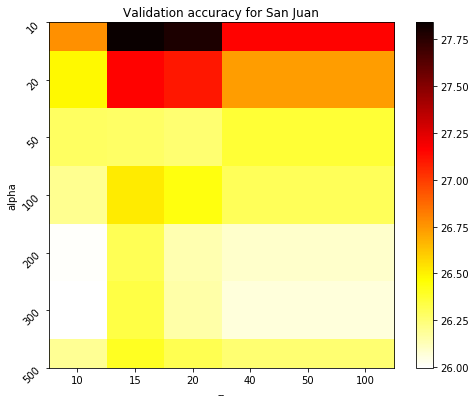

In [10]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores__mean_absulute_error_sj, interpolation='nearest', cmap=plt.cm.hot_r)
plt.ylabel('alpha')
plt.xlabel('--')
plt.colorbar()
plt.yticks(np.arange(len(parameters1_SanJuan)), parameters1_SanJuan, rotation=45)
plt.xticks(np.arange(len(parameters2_SanJuan)), parameters2_SanJuan)
plt.title('Validation accuracy for San Juan')
plt.show()

## Hyperparameter tuning for Iquitos with RandomForest

In [11]:
parameters1_Iquitos = [20,50,100,200,300,400,500]
parameters2_Iquitos = [10,15,20,40]

param1_iq_2, param2_iq_2, scores__mean_absulute_error_iq = find_best_params_RandomForest(X_iq_train,
                                                                                 y_iq_train,
                                                                                 X_iq_test,
                                                                                 y_iq_test,
                                                                                 parameters1_Iquitos,
                                                                                 parameters2_Iquitos)

mean_absolute_error [n_estimators,max_depth]: mean absolute error
mean_absolute_error [20,10]: 7.8710424730285125
mean_absolute_error [20,15]: 8.017294538585821
mean_absolute_error [20,20]: 8.058333333333334
mean_absolute_error [20,40]: 8.058333333333334
mean_absolute_error [50,10]: 7.60749721287072
mean_absolute_error [50,15]: 7.593875092920901
mean_absolute_error [50,20]: 7.603846153846154
mean_absolute_error [50,40]: 7.603846153846154
mean_absolute_error [100,10]: 7.478596712184853
mean_absolute_error [100,15]: 7.523376223307096
mean_absolute_error [100,20]: 7.526666666666667
mean_absolute_error [100,40]: 7.526666666666667
mean_absolute_error [200,10]: 7.477023508589982
mean_absolute_error [200,15]: 7.503239767126568
mean_absolute_error [200,20]: 7.514038461538462
mean_absolute_error [200,40]: 7.514038461538462
mean_absolute_error [300,10]: 7.5042319086394675
mean_absolute_error [300,15]: 7.53208017442149
mean_absolute_error [300,20]: 7.559034868487993
mean_absolute_error [300,40]: 

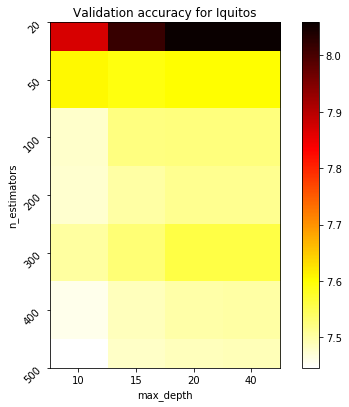

In [12]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores__mean_absulute_error_iq, interpolation='nearest', cmap=plt.cm.hot_r)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
plt.colorbar()
plt.yticks(np.arange(len(parameters1_Iquitos)), parameters1_Iquitos, rotation=45)
plt.xticks(np.arange(len(parameters2_Iquitos)), parameters2_Iquitos)
plt.title('Validation accuracy for Iquitos')
plt.show()

 ## Final evaluation of models

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
best_sj_HistGradientBoosting = HistGradientBoostingRegressor(loss='least_squares',
                                     learning_rate=0.05,
                                     max_iter=param1_sj_1,
                                     max_leaf_nodes=param2_sj_1,
                                     max_depth=param3_sj_1,
                                     min_samples_leaf=20,
                                     l2_regularization=0.6,
                                     max_bins=param4_sj_1,
                                     scoring=None,
                                     validation_fraction=0.6,
                                     n_iter_no_change=None,
                                     tol=1e-07, 
                                     verbose=0,
                                     random_state=0)
best_iq_HistGradientBoosting = HistGradientBoostingRegressor(loss='least_squares',
                                     learning_rate=0.05,
                                     max_iter=param1_iq_1,
                                     max_leaf_nodes=param2_iq_1,
                                     max_depth=param3_iq_1,
                                     min_samples_leaf=20,
                                     l2_regularization=0.6,
                                     max_bins=param4_iq_1,
                                     scoring=None,
                                     validation_fraction=0.6,
                                     n_iter_no_change=None,
                                     tol=1e-07, 
                                     verbose=0,
                                     random_state=0)

best_sj_RandomForest = RandomForestRegressor(n_estimators=param1_sj_2,
                                              max_depth=param2_sj_2,
                                              criterion='mse',
                                              random_state=0,
                                              warm_start = True,
                                              n_jobs=8)

best_iq_RandomForest = RandomForestRegressor(n_estimators=param1_iq_2,
                                              max_depth=param2_iq_2,
                                              criterion='mse',
                                              random_state=0,
                                              warm_start = True,
                                              n_jobs=8)



In [15]:
best_sj_HistGradientBoosting.fit(X_sj_train,y_sj_train)
best_iq_HistGradientBoosting.fit(X_iq_train,y_iq_train)

HistGradientBoostingRegressor(l2_regularization=0.6, learning_rate=0.05,
                              loss='least_squares', max_bins=32, max_depth=10,
                              max_iter=10, max_leaf_nodes=16,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=0, scoring=None, tol=1e-07,
                              validation_fraction=0.6, verbose=0)

In [16]:
predictions_sj_HistGradientBoosting = best_sj_HistGradientBoosting.predict(X_sj_test)
predictions_iq_HistGradientBoosting = best_iq_HistGradientBoosting.predict(X_iq_test)

For San Juan
 
mean_squared_error: 907.0731153914297
mean_absolute_error: 24.11968480590973


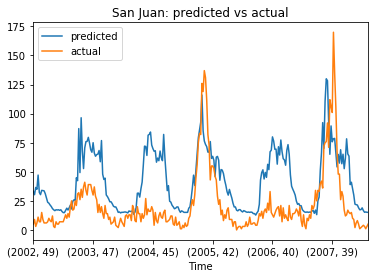

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("For San Juan\n ")
print("mean_squared_error: {0}".format(mean_squared_error(y_sj_test, predictions_sj_HistGradientBoosting)))
print("mean_absolute_error: {0}".format(mean_absolute_error(y_sj_test, predictions_sj_HistGradientBoosting)))


df1 = pd.DataFrame({"predicted":predictions_sj_HistGradientBoosting,"actual":y_sj_test})

df1.plot()
plt.title('San Juan: predicted vs actual')
plt.xlabel('Time')
plt.legend()


For Iquitos
 
mean_squared_error: 147.84487688980383
mean_absolute_error: 7.3675352350687895


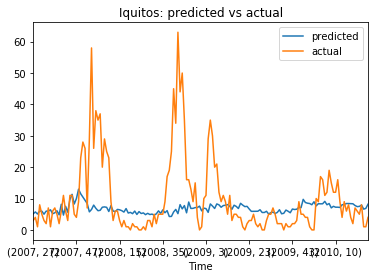

In [18]:
print("\nFor Iquitos\n ")
print("mean_squared_error: {0}".format(mean_squared_error(y_iq_test, predictions_iq_HistGradientBoosting)))
print("mean_absolute_error: {0}".format(mean_absolute_error(y_iq_test, predictions_iq_HistGradientBoosting)))

df2 = pd.DataFrame({"predicted":predictions_iq_HistGradientBoosting,"actual":y_iq_test})

df2.plot()
plt.title('Iquitos: predicted vs actual')
plt.xlabel('Time')

plt.legend()

In [21]:
predictions_sj = best_sj_RandomForest.predict(sanJuan_features)
predictions_iq = best_iq_RandomForest.predict(iquitos_features)
#predictions_sj = best_sj_HistGradientBoosting.predict(sanJuan_features)
#predictions_iq = best_iq_HistGradientBoosting.predict(iquitos_features)



NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("For San Juan\n ")
print("mean_squared_error: {0}".format(mean_squared_error(sanJuan_targets, predictions_sj)))
print("mean_absolute_error: {0}".format(mean_absolute_error(sanJuan_targets, predictions_sj)))

df1 = pd.DataFrame({"predicted":predictions_sj,"actual":sanJuan_targets})

df1.plot()
plt.title('San Juan: predicted vs actual')
plt.xlabel('Time')
plt.legend()

For San Juan
 


NameError: name 'predictions_sj' is not defined

In [23]:
print("\nFor Iquitos\n ")
print("mean_squared_error: {0}".format(mean_squared_error(iquitos_targets, predictions_iq)))
print("mean_absolute_error: {0}".format(mean_absolute_error(iquitos_targets, predictions_iq)))


df2 = pd.DataFrame({"predicted":predictions_iq,"actual":iquitos_targets})

df2.plot()
plt.title('Iquitos: predicted vs actual')
plt.xlabel('Time')

plt.legend()


For Iquitos
 


NameError: name 'predictions_iq' is not defined

## Submissions

In [24]:
best_sj_HistGradientBoosting.fit(sanJuan_features,sanJuan_targets)
best_iq_HistGradientBoosting.fit(iquitos_features,iquitos_targets)

HistGradientBoostingRegressor(l2_regularization=0.6, learning_rate=0.05,
                              loss='least_squares', max_bins=32, max_depth=10,
                              max_iter=10, max_leaf_nodes=16,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=0, scoring=None, tol=1e-07,
                              validation_fraction=0.6, verbose=0)

In [27]:
sj_test , iq_test = preprocess_data('dengue_features_test.csv',
                                   lag_step_for_SanJuan = lag_step_for_SanJuan,
                                   lag_step_for_Iquitos = lag_step_for_Iquitos)

sj_predictions = best_sj_HistGradientBoosting.predict(sj_test).astype(int)
iq_predictions = best_iq_HistGradientBoosting.predict(iq_test).astype(int)

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])


submission.total_cases = np.concatenate((sj_predictions, iq_predictions),axis=0)
#submission.to_csv("submissionbest_HistGradientBoosting.csv")
submission.to_csv("submissionbest_RaandomForest.csv")

C:\Users\PERSONAL\Desktop\Study\Projects\LeadingIndia Mentorship Projects\DengAI\DengAI-master\DengAI-master\dataPreprocessing.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column + "_time - " + str(lag)] = dataframe[column].shift(lag)  # copy the previous value
C:\Users\PERSONAL\Desktop\Study\Projects\LeadingIndia Mentorship Projects\DengAI\DengAI-master\DengAI-master\dataPreprocessing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
C:\ProgramData\Anaconda